<a href="https://colab.research.google.com/github/Ghosty032/CANTILEVER/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv("fraudTrain.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42831 non-null  int64  
 1   trans_date_trans_time  42831 non-null  object 
 2   cc_num                 42831 non-null  int64  
 3   merchant               42831 non-null  object 
 4   category               42831 non-null  object 
 5   amt                    42831 non-null  float64
 6   first                  42831 non-null  object 
 7   last                   42831 non-null  object 
 8   gender                 42831 non-null  object 
 9   street                 42831 non-null  object 
 10  city                   42831 non-null  object 
 11  state                  42831 non-null  object 
 12  zip                    42831 non-null  int64  
 13  lat                    42831 non-null  float64
 14  long                   42831 non-null  float64
 15  ci

In [ ]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42826,42826,2019-01-26 15:08:27,3524574586339330,fraud_McKenzie-Huels,food_dining,28.37,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,b84678e05a1fe0423c27edd44c47a912,1.327591e+09,27.958330,-79.973208,0.0
42827,42827,2019-01-26 15:09:26,4364010865167176,fraud_Barton LLC,kids_pets,84.71,Gary,Martinez,M,03512 Jackson Ports,...,39.5483,-119.7957,276896.0,Immunologist,1997-03-12,0576985c3ab2858e0371085ab4dbb8f7,1.327591e+09,39.801946,-119.286741,0.0
42828,42828,2019-01-26 15:10:11,3576431665303017,fraud_Erdman-Durgan,health_fitness,134.53,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922.0,Contractor,1981-10-24,6e6fd83b78d11122c559036e9208b7e1,1.327591e+09,33.042530,-111.186488,0.0
42829,42829,2019-01-26 15:12:12,30238755902988,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,Danielle,Yu,F,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766.0,Press sub,1976-01-02,ab09218dab34d39e7ef174655b21a28c,1.327591e+09,31.461002,-96.868171,0.0


In [ ]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42826,fraud_McKenzie-Huels,food_dining,28.37,F,27.6330,-80.4031,105638.0,"Librarian, public",1.327591e+09,27.958330,-79.973208,0.0
42827,fraud_Barton LLC,kids_pets,84.71,M,39.5483,-119.7957,276896.0,Immunologist,1.327591e+09,39.801946,-119.286741,0.0
42828,fraud_Erdman-Durgan,health_fitness,134.53,F,33.5623,-112.0559,1312922.0,Contractor,1.327591e+09,33.042530,-111.186488,0.0
42829,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,F,30.5920,-97.2893,1766.0,Press sub,1.327591e+09,31.461002,-96.868171,0.0


In [ ]:
#Dropping all the rows that have no data
train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42826,fraud_McKenzie-Huels,food_dining,28.37,F,27.6330,-80.4031,105638.0,"Librarian, public",1.327591e+09,27.958330,-79.973208,0.0
42827,fraud_Barton LLC,kids_pets,84.71,M,39.5483,-119.7957,276896.0,Immunologist,1.327591e+09,39.801946,-119.286741,0.0
42828,fraud_Erdman-Durgan,health_fitness,134.53,F,33.5623,-112.0559,1312922.0,Contractor,1.327591e+09,33.042530,-111.186488,0.0
42829,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,F,30.5920,-97.2893,1766.0,Press sub,1.327591e+09,31.461002,-96.868171,0.0


In [ ]:
train_data.dropna(ignore_index=True)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42825,fraud_Kutch-Ferry,home,79.33,M,43.0048,-108.8964,1645.0,Freight forwarder,1.327590e+09,43.018053,-108.540960,0.0
42826,fraud_McKenzie-Huels,food_dining,28.37,F,27.6330,-80.4031,105638.0,"Librarian, public",1.327591e+09,27.958330,-79.973208,0.0
42827,fraud_Barton LLC,kids_pets,84.71,M,39.5483,-119.7957,276896.0,Immunologist,1.327591e+09,39.801946,-119.286741,0.0
42828,fraud_Erdman-Durgan,health_fitness,134.53,F,33.5623,-112.0559,1312922.0,Contractor,1.327591e+09,33.042530,-111.186488,0.0


In [ ]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [ ]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42826,418,1,28.37,0,27.6330,-80.4031,105638.0,258,1.327591e+09,27.958330,-79.973208,0.0
42827,26,7,84.71,1,39.5483,-119.7957,276896.0,232,1.327591e+09,39.801946,-119.286741,0.0
42828,160,5,134.53,0,33.5623,-112.0559,1312922.0,101,1.327591e+09,33.042530,-111.186488,0.0
42829,17,12,2.42,0,30.5920,-97.2893,1766.0,335,1.327591e+09,31.461002,-96.868171,0.0


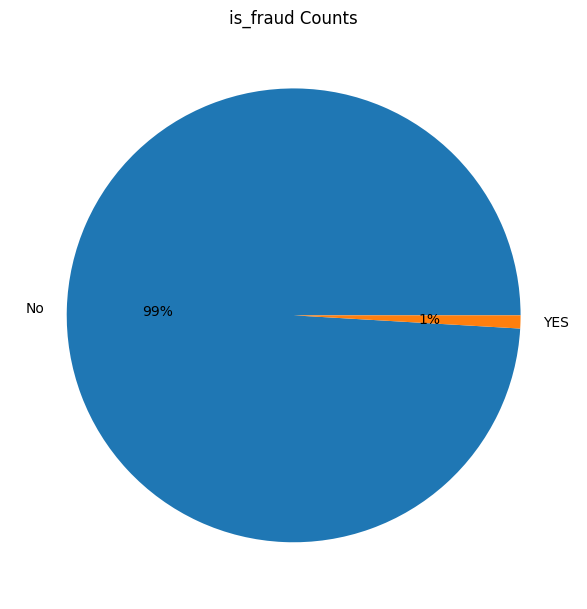

In [ ]:
#Performing Exploratry Data Analysis

exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
train_data.dropna(inplace=True)
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [ ]:
model = SVC()
model.fit(X, Y)

SVC()

In [ ]:
model.score(X, Y)

0.9907307961709082

In [ ]:
test_data = pd.read_csv("fraudTest.csv")
test_data

ParserError: Error tokenizing data. C error: Expected 23 fields in line 7799, saw 25


In [ ]:
test_data = pd.read_csv("fraudTest.csv", on_bad_lines='skip', quoting=3)
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
2,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
3,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520.0,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1.371817e+09,41.747157,-77.584197,0.0
4,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1.371817e+09,31.782919,-96.366185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,27225,2020-06-30 08:18:37,30442439074871,fraud_Strosin-Cruickshank,grocery_pos,191.58,Linda,Sanchez,F,6574 William Hill Apt. 375,...,41.5744,-75.5881,6508.0,Training and development officer,1981-06-22,13d85b902905eb8e540f84e87182baef,1.372580e+09,42.204546,-74.751504,0.0
18206,27227,2020-06-30 08:19:04,4957924165498,fraud_Rau and Sons,grocery_pos,115.04,Alan,Parsons,M,0547 Russell Ford Suite 574,...,39.6171,-102.4776,207.0,Network engineer,1955-12-04,294edab2605e75d9a2ae259f6e34c219,1.372580e+09,40.425009,-103.033473,0.0
18207,27229,2020-06-30 08:20:07,2252055259910912,fraud_Predovic Inc,shopping_net,99.38,Jason,Hernandez,M,220 Frank Gardens,...,44.6437,-90.1031,828.0,Arts development officer,1991-08-19,2f18056ac63af2a145a46a5ed4a56a98,1.372580e+09,45.047168,-89.651536,0.0
18208,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0


In [ ]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
2,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
3,fraud_Daugherty LLC,kids_pets,19.55,F,42.1939,-76.7361,520.0,Psychotherapist,1.371817e+09,41.747157,-77.584197,0.0
4,fraud_Kilback Group,food_dining,66.54,F,31.6591,-96.8094,263.0,Barrister,1.371817e+09,31.782919,-96.366185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18205,fraud_Strosin-Cruickshank,grocery_pos,191.58,F,41.5744,-75.5881,6508.0,Training and development officer,1.372580e+09,42.204546,-74.751504,0.0
18206,fraud_Rau and Sons,grocery_pos,115.04,M,39.6171,-102.4776,207.0,Network engineer,1.372580e+09,40.425009,-103.033473,0.0
18207,fraud_Predovic Inc,shopping_net,99.38,M,44.6437,-90.1031,828.0,Arts development officer,1.372580e+09,45.047168,-89.651536,0.0
18208,fraud_Padberg-Welch,grocery_pos,84.05,F,26.3304,-81.5871,276002.0,Medical technical officer,1.372581e+09,25.873441,-81.589103,0.0


In [ ]:
test_data.dropna(inplace=True)

test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,237,10,2.86,1,33.9659,-80.9355,333497.0,206,1.371817e+09,33.986391,-81.200714,0.0
1,167,9,60.05,1,28.5697,-80.8191,54767.0,302,1.371817e+09,28.812398,-80.883061,0.0
2,216,13,3.19,1,44.2529,-85.0170,1126.0,139,1.371817e+09,44.959148,-85.884734,0.0
3,95,7,19.55,0,42.1939,-76.7361,520.0,271,1.371817e+09,41.747157,-77.584197,0.0
4,234,1,66.54,0,31.6591,-96.8094,263.0,35,1.371817e+09,31.782919,-96.366185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18204,138,2,73.83,1,30.4590,-90.9027,71335.0,154,1.372580e+09,29.605122,-91.001910,0.0
18205,424,4,191.58,0,41.5744,-75.5881,6508.0,339,1.372580e+09,42.204546,-74.751504,0.0
18206,355,4,115.04,1,39.6171,-102.4776,207.0,227,1.372580e+09,40.425009,-103.033473,0.0
18207,349,11,99.38,1,44.6437,-90.1031,828.0,31,1.372580e+09,45.047168,-89.651536,0.0


In [ ]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [ ]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,237,10,2.86,1,33.9659,-80.9355,333497.0,206,1.371817e+09,33.986391,-81.200714,0.0
1,167,9,60.05,1,28.5697,-80.8191,54767.0,302,1.371817e+09,28.812398,-80.883061,0.0
2,216,13,3.19,1,44.2529,-85.0170,1126.0,139,1.371817e+09,44.959148,-85.884734,0.0
3,95,7,19.55,0,42.1939,-76.7361,520.0,271,1.371817e+09,41.747157,-77.584197,0.0
4,234,1,66.54,0,31.6591,-96.8094,263.0,35,1.371817e+09,31.782919,-96.366185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18204,138,2,73.83,1,30.4590,-90.9027,71335.0,154,1.372580e+09,29.605122,-91.001910,0.0
18205,424,4,191.58,0,41.5744,-75.5881,6508.0,339,1.372580e+09,42.204546,-74.751504,0.0
18206,355,4,115.04,1,39.6171,-102.4776,207.0,227,1.372580e+09,40.425009,-103.033473,0.0
18207,349,11,99.38,1,44.6437,-90.1031,828.0,31,1.372580e+09,45.047168,-89.651536,0.0


In [ ]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

accuracy = model.score(X_test, Y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.996540172442199
